In [22]:
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')



In [23]:
# Reusing from main Jupyter notebook
house_csv = "resources/melb_data.csv"
house_df = pd.read_csv(house_csv)
venus_csv = "resources/Melbourne_venues.csv"
venus_df = pd.read_csv(venus_csv)

In [24]:
# Mean data by suburb
house_by_suburb_df = house_df.groupby('Suburb').mean()
house_by_suburb_df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Suburb,,,,,,,,,,,,,
Abbotsford,2.410714,1.060366e+06,2.616071,3067.0,2.410714,1.410714,0.946429,292.446429,103.000000,1945.184211,-37.804339,144.997176,4019.0
Aberfeldie,3.090909,1.277455e+06,8.627273,3040.0,3.000000,1.863636,1.977273,514.772727,163.692000,1979.100000,-37.759280,144.897587,1543.0
Airport West,3.000000,7.566567e+05,12.482090,3042.0,2.865672,1.477612,1.641791,432.880597,135.272895,1984.476190,-37.723399,144.879635,3464.0
Albanvale,3.000000,5.370833e+05,14.000000,3021.0,3.000000,1.333333,2.166667,501.166667,123.000000,1980.000000,-37.745640,144.770878,1899.0
Albert Park,2.710145,1.941355e+06,3.230435,3206.0,2.666667,1.434783,0.727273,176.652174,123.485294,1903.756757,-37.844127,144.953107,3280.0


In [25]:
#Filtering for newer house only
new_house_df = house_df[house_df['YearBuilt'] > 1950] 
new_house_df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
19,Abbotsford,42 Valiant St,2,h,890000.0,S,Biggin,17/09/2016,2.5,3067.0,...,1.0,1.0,150.0,73.0,1985.0,Yarra,-37.80110,145.00040,Northern Metropolitan,4019.0
21,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,18/03/2017,2.5,3067.0,...,2.0,2.0,0.0,NaN,2010.0,Yarra,-37.80930,144.99590,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0


In [26]:
# What is the average price of the properties based on the year they built it
house_by_year_df = new_house_df.groupby('YearBuilt').mean()
house_by_year_df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
YearBuilt,,,,,,,,,,,,
1951.0,3.250000,1.762875e+06,9.175000,3096.750000,3.500000,2.250000,2.500000,844.500000,240.333333,-37.813275,144.996875,5342.000000
1952.0,2.750000,1.172500e+06,10.850000,3121.750000,2.750000,1.250000,1.500000,475.500000,109.000000,-37.801963,145.021785,6565.000000
1953.0,2.800000,1.357000e+06,11.180000,3116.400000,2.800000,1.400000,1.800000,755.400000,88.333333,-37.852736,145.020484,6699.600000
1954.0,3.000000,1.063667e+06,14.533333,3127.333333,3.000000,1.666667,1.333333,869.333333,150.000000,-37.801680,145.121813,5979.666667
1955.0,3.230000,1.064688e+06,11.249000,3088.770000,3.170000,1.440000,1.940000,585.790000,142.241379,-37.799722,145.004511,6273.190000
...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,2.900000,9.219150e+05,10.166000,3089.120000,2.890000,1.950000,1.580000,273.260000,144.662921,-37.796341,144.974806,8713.220000
2015.0,3.276923,1.231485e+06,10.669231,3108.615385,3.200000,2.261538,1.646154,446.200000,195.558333,-37.796393,144.986468,6800.446154
2016.0,3.500000,1.523655e+06,9.793103,3096.189655,3.534483,2.534483,1.706897,425.517241,226.701754,-37.803666,144.997946,6746.706897


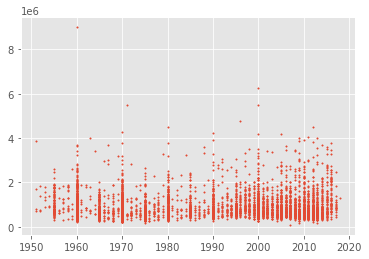

In [40]:
x = np.array(new_house_df['YearBuilt'])
y = np.array(new_house_df['Price'])
plt.scatter(x,y, s=2)

